In [67]:
%load_ext autoreload
%autoreload 1
%autosave 60

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


Autosaving every 60 seconds


In [68]:
import sys
import pandas as pd
import numpy as np
import importlib
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm, PowerNorm
import scanpy
import gseapy as gp

In [69]:
sys.path.append("/u/davidm/Documents/Master-thesis/Scripts/RNA-seq/python/")

In [70]:
import rnaseq
importlib.reload(rnaseq)

<module 'rnaseq' from '/u/davidm/Documents/Master-thesis/Scripts/RNA-seq/python/rnaseq/__init__.py'>

In [71]:
%%bash
pwd

/u/davidm/Documents/Master-thesis/Projects/scBC-Analysis/0_Preprocessing/2_Cells-filtering/dsp762


In [72]:
# %%bash
# tar czf ./figs.tar.gz ./figs/*.pdf

### Plotting parameters

In [73]:
%matplotlib inline
plt.rcParams['figure.dpi'] = 110
plt.rcParams['font.size'] = 6

### Genes lists

In [74]:
cell_cycle_genes = np.array(['MCM5', 'PCNA', 'TYMS', 'FEN1', 'MCM2', 'MCM4', 'RRM1', 'UNG',
       'GINS2', 'MCM6', 'CDCA7', 'DTL', 'PRIM1', 'UHRF1', 'HELLS', 'RFC2',
       'RPA2', 'NASP', 'RAD51AP1', 'GMNN', 'WDR76', 'SLBP', 'CCNE2',
       'UBR7', 'POLD3', 'MSH2', 'ATAD2', 'RAD51', 'RRM2', 'CDC45', 'CDC6',
       'EXO1', 'TIPIN', 'DSCC1', 'BLM', 'CASP8AP2', 'USP1', 'CLSPN',
       'POLA1', 'CHAF1B', 'BRIP1', 'E2F8', 'HMGB2', 'CDK1', 'NUSAP1',
       'UBE2C', 'BIRC5', 'TPX2', 'TOP2A', 'NDC80', 'CKS2', 'NUF2',
       'CKS1B', 'MKI67', 'TMPO', 'CENPF', 'TACC3', 'SMC4', 'CCNB2',
       'CKAP2L', 'CKAP2', 'AURKB', 'BUB1', 'KIF11', 'ANP32E', 'TUBB4B',
       'GTSE1', 'KIF20B', 'HJURP', 'CDCA3', 'CDC20', 'TTK', 'CDC25C',
       'KIF2C', 'RANGAP1', 'NCAPD2', 'DLGAP5', 'CDCA2', 'CDCA8', 'ECT2',
       'KIF23', 'HMMR', 'AURKA', 'PSRC1', 'ANLN', 'LBR', 'CKAP5', 'CENPE',
       'CTCF', 'NEK2', 'G2E3', 'GAS2L3', 'CBX5', 'CENPA'])

s_genes = cell_cycle_genes[:43]
g2m_genes = cell_cycle_genes[43:]

In [75]:
g2m_genes = ['ABL1', 'AMD1', 'ARID4A', 'ATF5', 'ATRX', 'AURKA', 'AURKB',
       'BARD1', 'BCL3', 'BIRC5', 'BRCA2', 'BUB1', 'BUB3', 'CASP8AP2',
       'CBX1', 'CCNA2', 'CCNB2', 'CCND1', 'CCNF', 'CCNT1', 'CDC20',
       'CDC25A', 'CDC25B', 'CDC27', 'CDC45', 'CDC6', 'CDC7', 'CDK1',
       'CDK4', 'CDKN1B', 'CDKN2C', 'CDKN3', 'CENPA', 'CENPE', 'CENPF',
       'CHAF1A', 'CHEK1', 'CHMP1A', 'CKS1B', 'CKS2', 'CTCF', 'CUL1',
       'CUL3', 'CUL4A', 'CUL5', 'DBF4', 'DDX39A', 'DKC1', 'DMD', 'DR1',
       'DTYMK', 'E2F1', 'E2F2', 'E2F3', 'E2F4', 'EFNA5', 'EGF', 'ESPL1',
       'EWSR1', 'EXO1', 'EZH2', 'FANCC', 'FBXO5', 'FOXN3', 'G3BP1',
       'GINS2', 'GSPT1', 'H2AX', 'H2AZ1', 'H2AZ2', 'H2BC12', 'HIF1A',
       'HIRA', 'HMGA1', 'HMGB3', 'HMGN2', 'HMMR', 'HNRNPD', 'HNRNPU',
       'HOXC10', 'HSPA8', 'HUS1', 'ILF3', 'INCENP', 'JPT1', 'KATNA1',
       'KIF11', 'KIF15', 'KIF20B', 'KIF22', 'KIF23', 'KIF2C', 'KIF4A',
       'KIF5B', 'KMT5A', 'KNL1', 'KPNA2', 'KPNB1', 'LBR', 'LIG3', 'LMNB1',
       'MAD2L1', 'MAP3K20', 'MAPK14', 'MARCKS', 'MCM2', 'MCM3', 'MCM5',
       'MCM6', 'MEIS1', 'MEIS2', 'MKI67', 'MNAT1', 'MT2A', 'MTF2',
       'MYBL2', 'MYC', 'NASP', 'NCL', 'NDC80', 'NEK2', 'NOLC1', 'NOTCH2',
       'NSD2', 'NUMA1', 'NUP50', 'NUP98', 'NUSAP1', 'ODC1', 'ODF2',
       'ORC5', 'ORC6', 'PAFAH1B1', 'PBK', 'PDS5B', 'PLK1', 'PLK4', 'PML',
       'POLA2', 'POLE', 'POLQ', 'PRC1', 'PRIM2', 'PRMT5', 'PRPF4B',
       'PTTG1', 'PTTG3P', 'PURA', 'RACGAP1', 'RAD21', 'RAD23B', 'RAD54L',
       'RASAL2', 'RBL1', 'RBM14', 'RPA2', 'RPS6KA5', 'SAP30', 'SFPQ',
       'SLC12A2', 'SLC38A1', 'SLC7A1', 'SLC7A5', 'SMAD3', 'SMARCC1',
       'SMC1A', 'SMC2', 'SMC4', 'SNRPD1', 'SQLE', 'SRSF1', 'SRSF10',
       'SRSF2', 'SS18', 'STAG1', 'STIL', 'STMN1', 'SUV39H1', 'SYNCRIP',
       'TACC3', 'TENT4A', 'TFDP1', 'TGFB1', 'TLE3', 'TMPO', 'TNPO2',
       'TOP1', 'TOP2A', 'TPX2', 'TRA2B', 'TRAIP', 'TROAP', 'TTK', 'UBE2C',
       'UBE2S', 'UCK2', 'UPF1', 'WRN', 'XPO1', 'YTHDC1']

### Load sample

In [76]:
sample = "Sample_ZR75"
new_sample_name = "ZR75"
quant_params = "trimmed-reads-cutadapt-all/decoys-k19-1.4.0/customWh-top-3000"
genref = "human/assembly__GRCh38-hg38/annotation__gencode/gencode_34"
project = "dsp762"
cell_line = "ZR75"

In [77]:
sc = rnaseq.readwrite.read_raw(project_id  = project, quant_tool = "alevin", samples = sample, genes_id = "ensembl_gene_id", quant_params = quant_params, genref = genref, cdna = "3' tag", exp = "sc")
sc.obs_names = sc.obs["CB"].tolist()

/home/arion/davidm/Data/datasets/raw/private/RNA-seq/sc/dsp762/quant/alevin/human/assembly__GRCh38-hg38/annotation__gencode/gencode_34/trimmed-reads-cutadapt-all/decoys-k19-1.4.0/customWh-top-3000
Using BioMart Ensembl Genes 100 hsapiens_gene_ensembl for gene annotations.


In [78]:
rnaseq.setup.annotate_samples(sc, samples_annot_name = "samples", samples_annot = new_sample_name, ow = True)
rnaseq.setup.annotate_samples(sc, samples_annot_name = "cell_line", samples_annot = cell_line, ow = True)

rnaseq.setup.annotate_samples(sc, samples_annot_name = "total_UMIs", samples_annot = sc.X.toarray().sum(1).ravel())
rnaseq.setup.annotate_samples(sc, samples_annot_name = "#_genes", samples_annot = (sc.X.toarray() != 0).sum(1).ravel())
rnaseq.setup.annotate_samples(sc, samples_annot_name = "max_corr")
rnaseq.setup.annotate_samples(sc, samples_annot_name = "mt_frac")
rnaseq.setup.annotate_samples(sc, samples_annot_name = "rp_frac")

rnaseq.setup.annotate_genes(sc, "gene_biotype")

Annotating samples...
Annotating cell_line...
Annotating total_UMIs...
Annotating #_genes...
Annotating max_corr...
Normalization by total UMIs...
Log2 + 1 tranformation...
Annotating mt_frac...
Annotating chromosome_name using Biomart (Ensembl Genes 100, 'hsapiens_gene_ensembl')...
Annotating rp_frac...
Annotating external_gene_name using Biomart (Ensembl Genes 100, 'hsapiens_gene_ensembl')...
Annotating gene_biotype using Biomart (Ensembl Genes 100, 'hsapiens_gene_ensembl')...


In [79]:
sc._inplace_subset_obs(sc.obs["total_UMIs"] > 100)

In [80]:
sc.X.shape

(1771, 60240)

In [81]:
# x = sc.layers["raw"].toarray()[:, (sc.var["gene_biotype"] == "lncRNA") & (sc.var["external_gene_name"] != "MALAT1")]
x = sc.layers["raw"].toarray()[:, sc.var["gene_biotype"] == "lncRNA"]
sc.obs["lncRNA"] = x.sum(1) / sc.obs["total_UMIs"]

x = sc.layers["raw"].toarray()[:, sc.var["gene_biotype"] == "rRNA"]
sc.obs["rRNA"] = x.sum(1) / sc.obs["total_UMIs"]

x = sc.layers["raw"].toarray()[:, sc.var["gene_biotype"] == "Mt_rRNA"]
sc.obs["Mt_rRNA"] = x.sum(1) / sc.obs["total_UMIs"]

x = sc.layers["raw"].toarray()[:, sc.var["gene_biotype"] == "protein_coding"]
sc.obs["protein_coding"] = x.sum(1) / sc.obs["total_UMIs"]

x = sc.layers["raw"].toarray()[:, sc.var["gene_biotype"] == "processed_pseudogene"]
sc.obs["processed_pseudogene"] = x.sum(1) / sc.obs["total_UMIs"]

x = sc.layers["raw"].toarray()[:, [g.startswith("HSP") for g in sc.var["external_gene_name"]]]
sc.obs["hsp_frac"] = x.sum(1) / sc.obs["total_UMIs"]

In [82]:
rnaseq.pp.log_norm(sc, plot=False, inplace=True, ow = True, verbose = True)

sc.var_names = sc.var["external_gene_name"].values
sc.var_names = np.array(sc.var_names.values)
sc.var_names_make_unique()
scanpy.tl.score_genes_cell_cycle(sc, s_genes=s_genes, g2m_genes=g2m_genes)

Normalization by total UMIs...
Log2 + 1 tranformation...


In [83]:
sc_copy = sc.copy()

### QC distributions

In [84]:
sc = sc_copy.copy()

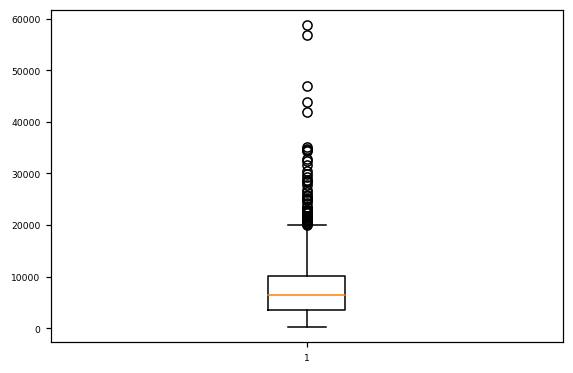

In [85]:
plt.boxplot(sc.obs["total_UMIs"]);

Text(0.5, 0, 'Nombre de UMI')

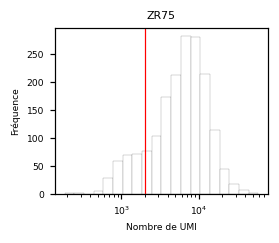

In [86]:
_,ax = plt.subplots(figsize=(2.5,2))
rnaseq.plotting.loghist(sc.obs["total_UMIs"], bins=20, ax=ax, linewidth=0.1, edgecolor='black', fc = "white");
# ax.set_xlim(200,25000)
plt.axvline(2000, linewidth = 0.8, c = 'red')
plt.title(new_sample_name)
plt.ylabel("Fréquence")
plt.xlabel("Nombre de UMI")
# plt.savefig(f"./figs/{prefix}_knee3.pdf");

Text(0.5, 0, 'Rmax')

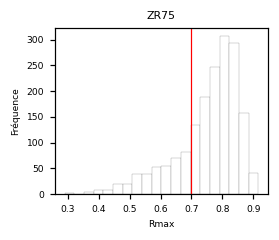

In [87]:
_,ax = plt.subplots(figsize=(2.5,2))
plt.hist(sc.obs["max_corr"], bins=20, linewidth=0.1, edgecolor='black', fc = "white");
plt.title(new_sample_name)
plt.axvline(0.7, linewidth = 0.8, c = 'red')
plt.ylabel("Fréquence")
plt.xlabel("Rmax")
# plt.savefig(f"./figs/{prefix}_knee3.pdf");

Text(0.5, 0, 'Fraction de Mt_rRNA')

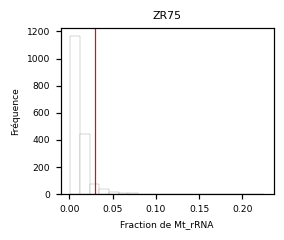

In [88]:
_,ax = plt.subplots(figsize=(2.5,2))
plt.hist(sc.obs["Mt_rRNA"], bins=20, linewidth=0.1, edgecolor='black', fc = "white");
plt.title(new_sample_name)
plt.axvline(0.03, linewidth = 0.8, c = 'red')
plt.ylabel("Fréquence")
plt.xlabel("Fraction de Mt_rRNA")
# plt.savefig(f"./figs/{prefix}_knee3.pdf");

### Explore sample

In [89]:
sc = sc_copy.copy()

In [90]:
metrics = ['total_UMIs', '#_genes', 'max_corr', 'MappingRate','DedupRate', 'mt_frac', 'rp_frac']
powers_metrics = [0.1,0.3,0.8,1.3,1.5,0.5,1.2]

biotypes = ['rRNA', 'Mt_rRNA', 'lncRNA', 'processed_pseudogene', 'protein_coding', 'G2M_score', 'hsp_frac', 'marker']
powers_biotypes = [1,0.5,0.5,0.5,1.8,0.5, 0.5, 1]

In [91]:
rnaseq.pp.log_norm(sc, plot=False, inplace=True, ow = True, verbose = True)
scanpy.pp.pca(sc, n_comps=50)
scanpy.pp.neighbors(sc, n_pcs=20, n_neighbors=15)
scanpy.tl.umap(sc, n_components=2)

Normalization by total UMIs...
Log2 + 1 tranformation...


In [92]:
sc.obs["marker"] = sc.X.toarray()[:, sc.var["external_gene_name"].values == "ALDOA"] # HSPA5 SERP1

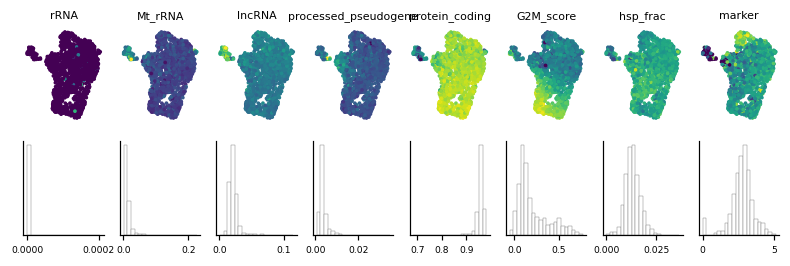

In [93]:
scatt = plt.subplots(figsize=(10,2.5), sharey=True)
for i,(c,p) in enumerate(zip(biotypes,powers_biotypes)):
    axi = plt.subplot(2,9,i+1)
    plt.title(c)
    plt.scatter(sc.obsm["X_umap"][:,0], sc.obsm["X_umap"][:,1], c = sc.obs[c], s = 2, norm = PowerNorm(p))
    plt.axis('off')

for j,c in enumerate(biotypes):
    axi = plt.subplot(2,9,i+j+3)
    axi.spines['right'].set_visible(False)
    axi.spines['top'].set_visible(False)
    axi.set_yticks([])
    plt.hist(sc.obs[c],  bins = 20, color="white", edgecolor="gray", linewidth = 0.3);

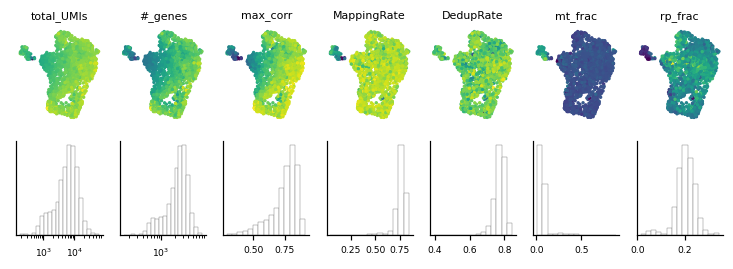

In [94]:
scatt = plt.subplots(figsize=(9.5,2.5), sharey=True)
for i,(c,p) in enumerate(zip(metrics,powers_metrics)):
    axi = plt.subplot(2,8,i+1)
    plt.title(c)
    plt.scatter(sc.obsm["X_umap"][:,0], sc.obsm["X_umap"][:,1], c = sc.obs[c], s = 1.5, norm = PowerNorm(p))
    plt.axis('off')

for j,c in enumerate(metrics):
    axi = plt.subplot(2,8,i+j+3)
    axi.spines['right'].set_visible(False)
    axi.spines['top'].set_visible(False)
    axi.set_yticks([])
    if c in ["total_UMIs", "#_genes"] :
        rnaseq.plotting.loghist(sc.obs[c], bins=20, ax=axi, linewidth=0.3, color="white", edgecolor="gray");
    else :
        plt.hist(sc.obs[c],  bins = 15, color="white", edgecolor="gray", linewidth = 0.3);

### Filter sample

In [102]:
sc = sc_copy.copy()

In [108]:
sc._inplace_subset_obs(sc.obs["total_UMIs"] > 1500)
sc._inplace_subset_obs(sc.obs["mt_frac"] < 0.1)

In [109]:
rnaseq.pp.log_norm(sc, plot=False, inplace=True, ow = True, verbose = True)
scanpy.pp.pca(sc, n_comps=50)
scanpy.pp.neighbors(sc, n_pcs=20, n_neighbors=15)
scanpy.tl.umap(sc, n_components=2)

Normalization by total UMIs...
Log2 + 1 tranformation...


In [110]:
sc.obs["marker"] = sc.X.toarray()[:, sc.var["external_gene_name"].values == "SPDEF"] # ENO1 ALDO1

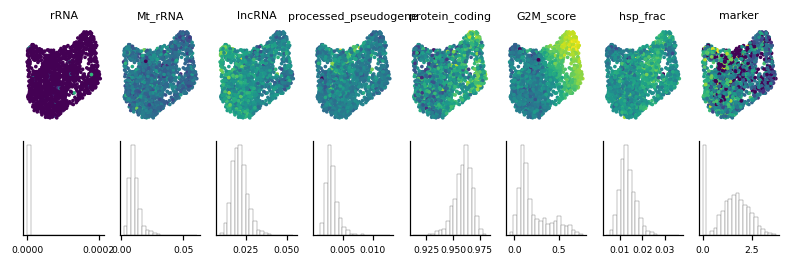

In [111]:
scatt = plt.subplots(figsize=(10,2.5), sharey=True)
for i,(c,p) in enumerate(zip(biotypes,powers_biotypes)):
    axi = plt.subplot(2,9,i+1)
    plt.title(c)
    plt.scatter(sc.obsm["X_umap"][:,0], sc.obsm["X_umap"][:,1], c = sc.obs[c], s = 2, norm = PowerNorm(p))
    plt.axis('off')

for j,c in enumerate(biotypes):
    axi = plt.subplot(2,9,i+j+3)
    axi.spines['right'].set_visible(False)
    axi.spines['top'].set_visible(False)
    axi.set_yticks([])
    plt.hist(sc.obs[c],  bins = 20, color="white", edgecolor="gray", linewidth = 0.3);

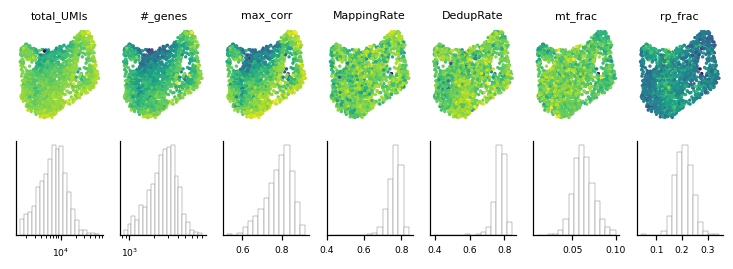

In [112]:
scatt = plt.subplots(figsize=(9.5,2.5), sharey=True)
for i,(c,p) in enumerate(zip(metrics,powers_metrics)):
    axi = plt.subplot(2,8,i+1)
    plt.title(c)
    plt.scatter(sc.obsm["X_umap"][:,0], sc.obsm["X_umap"][:,1], c = sc.obs[c], s = 1.5, norm = PowerNorm(p))
    plt.axis('off')

for j,c in enumerate(metrics):
    axi = plt.subplot(2,8,i+j+3)
    axi.spines['right'].set_visible(False)
    axi.spines['top'].set_visible(False)
    axi.set_yticks([])
    if c in ["total_UMIs", "#_genes"] :
        rnaseq.plotting.loghist(sc.obs[c], bins=20, ax=axi, linewidth=0.3, color="white", edgecolor="gray");
    else :
        plt.hist(sc.obs[c],  bins = 15, color="white", edgecolor="gray", linewidth = 0.3);

In [113]:
sc.X.shape

(1529, 60240)

### Save filtered data

In [114]:
rnaseq.readwrite.write_filtered(sc)

/u/davidm/VirtualEns/python_3.9.5/lib/python3.9/site-packages/anndata/_core/anndata.py:1220: FutureWarning: The `inplace` parameter in pandas.Categorical.reorder_categories is deprecated and will be removed in a future version. Reordering categories will always return a new Categorical object.
  c.reorder_categories(natsorted(c.categories), inplace=True)
... storing 'samples' as categorical
/u/davidm/VirtualEns/python_3.9.5/lib/python3.9/site-packages/anndata/_core/anndata.py:1220: FutureWarning: The `inplace` parameter in pandas.Categorical.reorder_categories is deprecated and will be removed in a future version. Reordering categories will always return a new Categorical object.
  c.reorder_categories(natsorted(c.categories), inplace=True)
... storing 'project_id' as categorical
/u/davidm/VirtualEns/python_3.9.5/lib/python3.9/site-packages/anndata/_core/anndata.py:1220: FutureWarning: The `inplace` parameter in pandas.Categorical.reorder_categories is deprecated and will be removed in

In [56]:
del sc, sc_copy

### Heterogeneity analysis

In [37]:
sc = rnaseq.readwrite.read_filtered(samples = {project : new_sample_name})

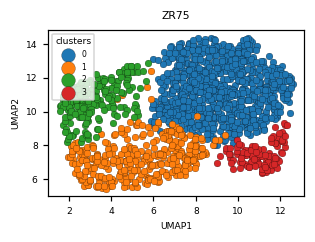

In [38]:
scanpy.tl.leiden(sc, resolution=0.3)

scatt,_ = plt.subplots(figsize=(3,2))

rnaseq.plotting.scatter(sc.obsm["X_umap"][:,0], sc.obsm["X_umap"][:,1], color = sc.obs["leiden"], \
    s = 20, xlabel="UMAP1", ylabel="UMAP2", color_title = "clusters",\
    title = new_sample_name, linewidth=0.15, fig = scatt)

In [39]:
rnaseq.setup.annotate_genes(sc, 'description')

Annotating description using Biomart (Ensembl Genes 100, 'hsapiens_gene_ensembl')...


In [45]:
gene_exp = pd.DataFrame(sc.X.toarray().T, columns = sc.obs["CB"].values)
class_vector = (sc.obs["leiden"].values == '3').astype(str)
class_vector = np.where(class_vector == 'True', "cluster", class_vector) 
class_vector = np.where(class_vector == 'False', "rest", class_vector) 

In [46]:
idx = np.argsort(class_vector)
gene_exp = gene_exp[gene_exp.columns[idx]]
gene_exp.insert(0, "DESCRIPTION", sc.var["description"].values, True)
gene_exp.insert(0, "NAME", sc.var["external_gene_name"].values, True)

class_vector = list(class_vector[idx])

In [47]:
gs_res = gp.gsea(gene_exp, # ordata='./P53_resampling_data.txt'
                 'MSigDB_Hallmark_2020', # enrichr library names
                  class_vector,
                 # set permutation_type to phenotype if samples >=15
                 permutation_type='phenotype',
                 permutation_num=100, # reduce number to speed up test
                 outdir=None,  # do not write output to disk
                 no_plot=True, # Skip plotting
                 method='signal_to_noise',
                 processes=4, seed= 7,
                 format='png')

2021-12-15 10:50:12,777 Warning: dropping duplicated gene names, only keep the first values


In [48]:
res = gs_res.res2d.sort_values(by='nes', ascending=False)
res = res.loc[res.index[(res['fdr'].values < 0.05) & (res['pval'].values < 0.05)]]

In [44]:
res #2

,es,nes,pval,fdr,geneset_size,matched_size,genes,ledge_genes
Term,,,,,,,,
E2F Targets,0.900053,3.443313,0.000000,0.000000,200,200,RRM2;UBE2T;ATAD2;PCNA;HMGB2;DUT;CDK1;RANBP1;CK...,RRM2;UBE2T;ATAD2;PCNA;HMGB2;DUT;CDK1;RANBP1;CK...
DNA Repair,0.700866,3.442409,0.000000,0.000000,150,146,PCNA;DUT;ZWINT;TYMS;RFC2;PRIM1;RFC4;FEN1;RFC3;...,PCNA;DUT;ZWINT;TYMS;RFC2;PRIM1;RFC4;FEN1;RFC3;...
G2-M Checkpoint,0.810293,3.431491,0.000000,0.000000,200,199,EXO1;CDK1;CKS1B;EZH2;H2AZ1;GINS2;STMN1;SMC4;TO...,EXO1;CDK1;CKS1B;EZH2;H2AZ1;GINS2;STMN1;SMC4;TO...
UV Response Up,0.596642,3.045767,0.000000,0.000000,158,135,RFC4;FEN1;BTG3;H2AX;PARP2;ATF3;CDK2;CEBPG;ASNS...,RFC4;FEN1;BTG3;H2AX;PARP2;ATF3;CDK2;CEBPG;ASNS...
Spermatogenesis,0.656902,2.983492,0.000000,0.000000,135,72,CDK1;EZH2;RFC4;PARP2;TOPBP1;DBF4;NCAPH;PSMG1;C...,CDK1;EZH2;RFC4;PARP2;TOPBP1;DBF4;NCAPH;PSMG1;C...
Myc Targets V1,0.720527,2.971651,0.000000,0.000000,200,200,PCNA;DUT;RANBP1;TYMS;MCM7;H2AZ1;MCM4;RFC4;DEK;...,PCNA;DUT;RANBP1;TYMS;MCM7;H2AZ1;MCM4;RFC4;DEK;...
Mitotic Spindle,0.621767,2.790611,0.000000,0.000000,199,197,CDK1;SMC4;TOP2A;FBXO5;PRC1;SMC3;NUSAP1;KIF15;K...,CDK1;SMC4;TOP2A;FBXO5;PRC1;SMC3;NUSAP1;KIF15;K...
mTORC1 Signaling,0.549378,2.598933,0.000000,0.000000,200,194,RRM2;DHFR;MCM4;MCM2;TUBG1;CACYBP;CDKN1A;TMEM97...,RRM2;DHFR;MCM4;MCM2;TUBG1;CACYBP;CDKN1A;TMEM97...
Myc Targets V2,0.649774,2.566192,0.000000,0.000000,58,58,MCM4;MCM5;PA2G4;TMEM97;CDK4;NOLC1;UNG;TCOF1;PL...,MCM4;MCM5;PA2G4;TMEM97;CDK4;NOLC1;UNG;TCOF1;PL...


In [49]:
res #3

,es,nes,pval,fdr,geneset_size,matched_size,genes,ledge_genes
Term,,,,,,,,
Hypoxia,0.794740,3.656446,0.000000,0.000000,200,148,LDHA;PGK1;ALDOA;GAPDH;ENO1;TPI1;NDRG1;GPI;BNIP...,LDHA;PGK1;ALDOA;GAPDH;ENO1;TPI1;NDRG1;GPI;BNIP...
Glycolysis,0.556500,2.871330,0.000000,0.000000,200,164,LDHA;PGK1;ALDOA;ENO1;TPI1;SLC16A3;PKM;SPAG4;P4...,LDHA;PGK1;ALDOA;ENO1;TPI1;SLC16A3;PKM;SPAG4;P4...
TNF-alpha Signaling via NF-kB,0.509653,2.357446,0.000000,0.000000,200,148,FOS;PNRC1;BTG1;BHLHE40;EGR1;EIF1;DUSP1;JUN;PDE...,FOS;PNRC1;BTG1;BHLHE40;EGR1;EIF1;DUSP1;JUN;PDE...
Epithelial Mesenchymal Transition,0.354941,1.818690,0.000000,0.010893,200,91,PLOD2;ENO2;QSOX1;JUN;LGALS1;MXRA5;EFEMP2;SAT1;...,PLOD2;ENO2;QSOX1;JUN;LGALS1;MXRA5;EFEMP2;SAT1;...
Estrogen Response Early,0.364548,1.753779,0.000000,0.008715,200,171,KRT19;KRT18;FOS;KRT8;ELF3;BHLHE40;TOB1;SLC2A1;...,KRT19;KRT18;FOS;KRT8;ELF3;BHLHE40;TOB1;SLC2A1;...
Androgen Response,0.372562,1.614913,0.000000,0.031124,100,87,KRT19;NDRG1;KRT8;SCD;H1-0;SPDEF;TPD52;SAT1;PIA...,KRT19;NDRG1;KRT8;SCD;H1-0;SPDEF;TPD52;SAT1;PIA...
KRAS Signaling Up,0.362254,1.613591,0.000000,0.027233,200,83,ANGPTL4;ERO1A;GPNMB;PPP1R15A;GADD45G;LCP1;PTPR...,ANGPTL4;ERO1A;GPNMB;PPP1R15A;GADD45G;LCP1;PTPR...
UV Response Dn,0.315746,1.574359,0.000000,0.038732,144,110,BHLHE40;VLDLR;CDKN1B;CITED2;DUSP1;ATRX;CCN1;AT...,BHLHE40;VLDLR;CDKN1B;CITED2;DUSP1;ATRX;CCN1;AT...
Apoptosis,-0.340985,-1.508426,0.032258,0.044169,161,119,BNIP3L;KRT18;ENO2;CDKN1B;H1-0;JUN;BCL10;TXNIP;...,LMNA;TNFRSF12A;FDXR;ETF1;TAP1;CDC25B;LGALS3;HM...


In [ ]:
sc.var_names = sc.var["external_gene_name"].values
scanpy.tl.rank_genes_groups(sc, groupby="leiden", n_genes=len(sc.var_names),rankby_abs=True, method="wilcoxon")

In [ ]:
rnaseq.dea.volcano_plot(sc, group="4", top=50)